# Life Expectancy and GDP

### Introduction

Execution Date: 2025-03-03  
Analyst: Shafronov Semyon  
Data Source: Codecademy.com  

Goal:  
• Find the relationship between GDP and life expectancy in six countries  
  
Tasks:  
• Acquire, describe, visualize, and analyze the data  
• Write out insights gained along with the analysis  
  
Hypothesis:  
• There is a strong relationship between GDP and life expectancy in each country  

#### Final conclusion

Similarities among all countries:  
• There is a strong positive relationship between GDP and life expectancy. Life expectancy changes along with GDP
• Life expectancy has increased over the past 16 years (by 15 years in Zimbabwe and by 2-4 years in the other countries)  
• GDP has significantly increased over the past 16 years, doubling in Germany, the USA, Mexico, and Zimbabwe, and increasing 4-7 times in Chile and China  
  
A low GDP doesn't necessarily indicate low life expectancy. For example, in Chile, the mean life expectancy ranks among the top two, while its GDP ranks among the bottom two.  
  
Differences among all countries:  
• The average life expectancy in Zimbabwe is only 50 years, while in the other five countries, life expectancy ranges between 74 and 79 years  
• All six countries differ significantly from each other in terms of absolute GDP values. The USA has the highest GDP, while Chile and Zimbabwe have the lowest GDP  
  
Dynamics:  
• All countries except Zimbabwe show consistent growth in GDP, while Zimbabwe experienced a decline in GDP until 2008, followed by explosive growth  
• The same trend applies to life expectancy: all countries except Zimbabwe show consistent growth in life expectancy, while Zimbabwe experienced a decline until 2004, followed by explosive growth  

#### Variables description

Country - nation (6 nations totally)  
Year - the year for the observation (16 years totally, 2000-2015)  
Expectancy - life expectancy value in years  
GDP - Gross Domestic Product in billions of dollars  

### First look at the data

#### Libraries

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# UDF Library
import functions_lib as udf

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Download Dataset
df = pd.read_csv('life_expectancy_gdp.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Number of rows and columns, non-null observations, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### Conclusion

Dataset Characteristics:  
• Dataset has 96 rows, 4 columns  
• No nulls  

### Primary data transformation

#### Data preprocessing

In [4]:
# Change column names to more convenient ones
df.columns = ['country', 'year', 'expectancy', 'gdp']

In [5]:
# Convert GDP into billions (more convenient)
df['gdp'] = df['gdp'] / (1_000_000_000)

In [6]:
# Turn the values into a more convenient format
df.loc[df['country'] == 'United States of America', 'country'] = 'USA'

In [7]:
# Dataset after preprocessing
df.head()

,country,year,expectancy,gdp
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


### Descriptive analysis

In [8]:
# Mode - most popular values
udf.top_n_popular_values(df, 6)

,column_name,value,count,percentage
0,country,Chile,16,16.67
1,country,China,16,16.67
2,country,Germany,16,16.67
3,country,Mexico,16,16.67
4,country,USA,16,16.67
5,country,Zimbabwe,16,16.67


,column_name,value,count,percentage
6,year,2000,6,6.25
7,year,2001,6,6.25
8,year,2002,6,6.25
9,year,2003,6,6.25
10,year,2004,6,6.25
11,year,2005,6,6.25


,column_name,value,count,percentage
12,expectancy,75.0,4,4.17
13,expectancy,78.9,3,3.12
14,expectancy,79.1,3,3.12
15,expectancy,75.6,3,3.12
16,expectancy,77.3,2,2.08
17,expectancy,78.7,2,2.08


,column_name,value,count,percentage
18,gdp,77.860932,1,1.04
19,gdp,70.979924,1,1.04
20,gdp,13900.0,1,1.04
21,gdp,13100.0,1,1.04
22,gdp,12300.0,1,1.04
23,gdp,11500.0,1,1.04


In [9]:
# Unique values
df.nunique()

country        6
year          16
expectancy    69
gdp           96
dtype: int64

In [10]:
# Descriptive statistics
df.describe(include='all')

,country,year,expectancy,gdp
count,96,96.000000,96.000000,96.000000
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3880.498571
std,NaN,4.633971,10.672882,5197.561311
min,NaN,2000.000000,44.300000,4.415703
25%,NaN,2003.750000,74.475000,173.301750
50%,NaN,2007.500000,76.750000,1280.220000
75%,NaN,2011.250000,78.900000,4067.510000


#### Conclusion

• Dataset contains data about 6 countries * 16 measures (years 2000 to 2015 inclusively)  
• GDP - Extremely right skewed distribution  
• Expectancy - Left skewed distribution  

### Univariate Statistics

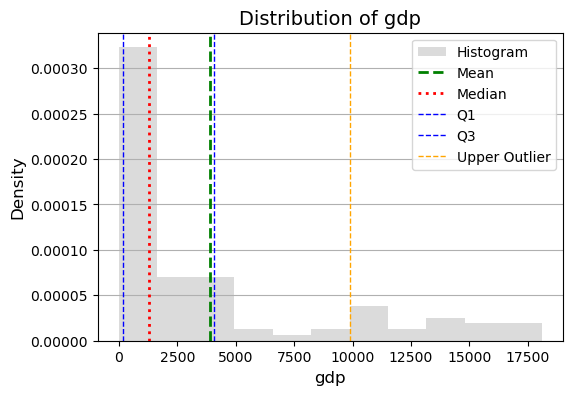

In [11]:
# GDP: histogram with mean, median, IQR, outliers
udf.numeric_distribution(df.gdp)

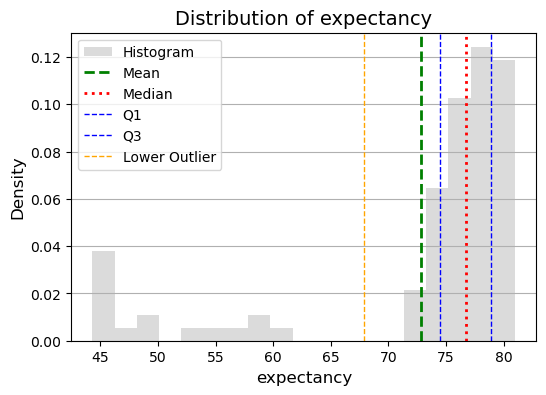

In [12]:
# Expectancy: histogram with mean, median, IQR, whiskers, outliers
udf.numeric_distribution(df.expectancy)

#### Conclusion

The absolute values of GDP in all countries differ significantly. Therefore, it doesn't make sense to analyze patterns across all countries in general. It is more meaningful to find relationships between life expectancy and GDP within each country and then compare the countries with one another.  

### Bivariate Statistics

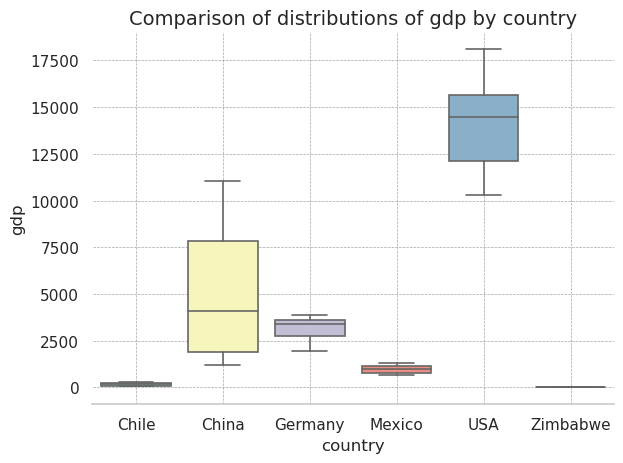

In [13]:
# GDP distributions by country
udf.categorical_numeric_relationship(df, x='country', y='gdp')

In [14]:
# Average GDP by country
df.groupby('country')['gdp'].mean()

country
Chile         169.788845
China        4957.713750
Germany      3094.775625
Mexico        976.650625
USA         14075.000000
Zimbabwe        9.062580
Name: gdp, dtype: float64

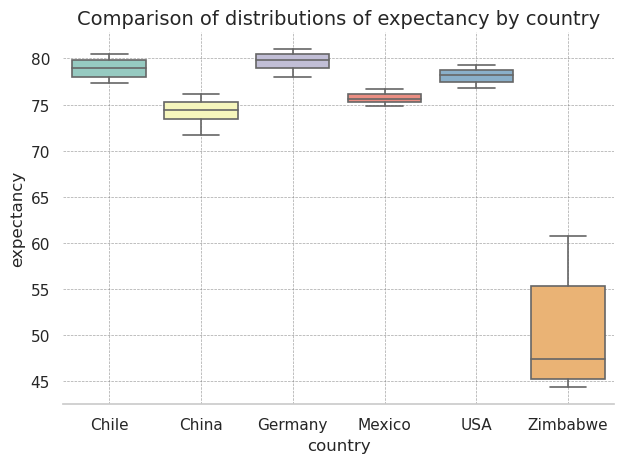

In [15]:
# Expectancy distributions by country
udf.categorical_numeric_relationship(df, x='country', y='expectancy')

In [16]:
# Average expectancy by country
df.groupby('country')['expectancy'].mean()

country
Chile       78.94375
China       74.26250
Germany     79.65625
Mexico      75.71875
USA         78.06250
Zimbabwe    50.09375
Name: expectancy, dtype: float64

#### Conclusion

GDP by country:  
• Chile and Zimbabwe have the lowest GDP  
• The USA has the highest GDP  
• China has the widest spread of data  
  
Expectancy by country:  
• Zimbabwe is radically lower in expectancy than the other countries  
• Zimbabwe has the widest spread in expectancy  

### Multivariate Statistics

In [17]:
# Correlation between life expectancy and GDP by country
for country in df.country.unique():
    correlation = round(df['expectancy'][df.country == country].corr(df['gdp'][df.country == country]), 2)
    print(f"{country}: {correlation}")

Chile: 0.95
China: 0.91
Germany: 0.93
Mexico: 0.93
USA: 0.98
Zimbabwe: 0.97


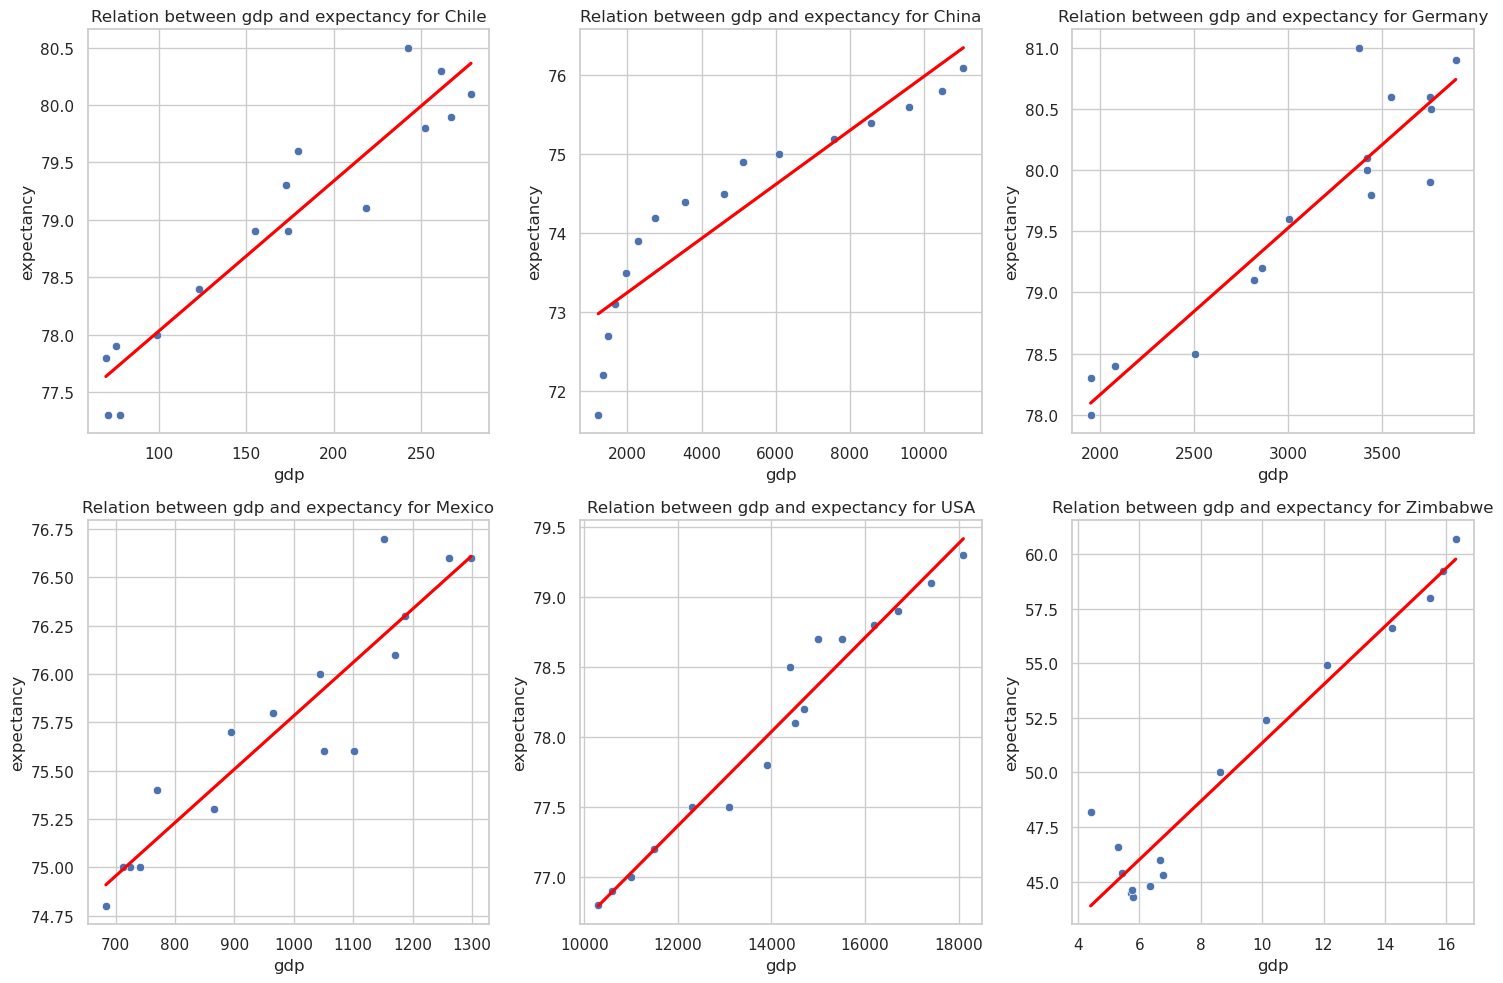

In [18]:
# Relation between GDP and life expectancy for each country
udf.plot_scatterplots_by_group(df, x='gdp', y='expectancy', groupby='country', plots_per_row=3)

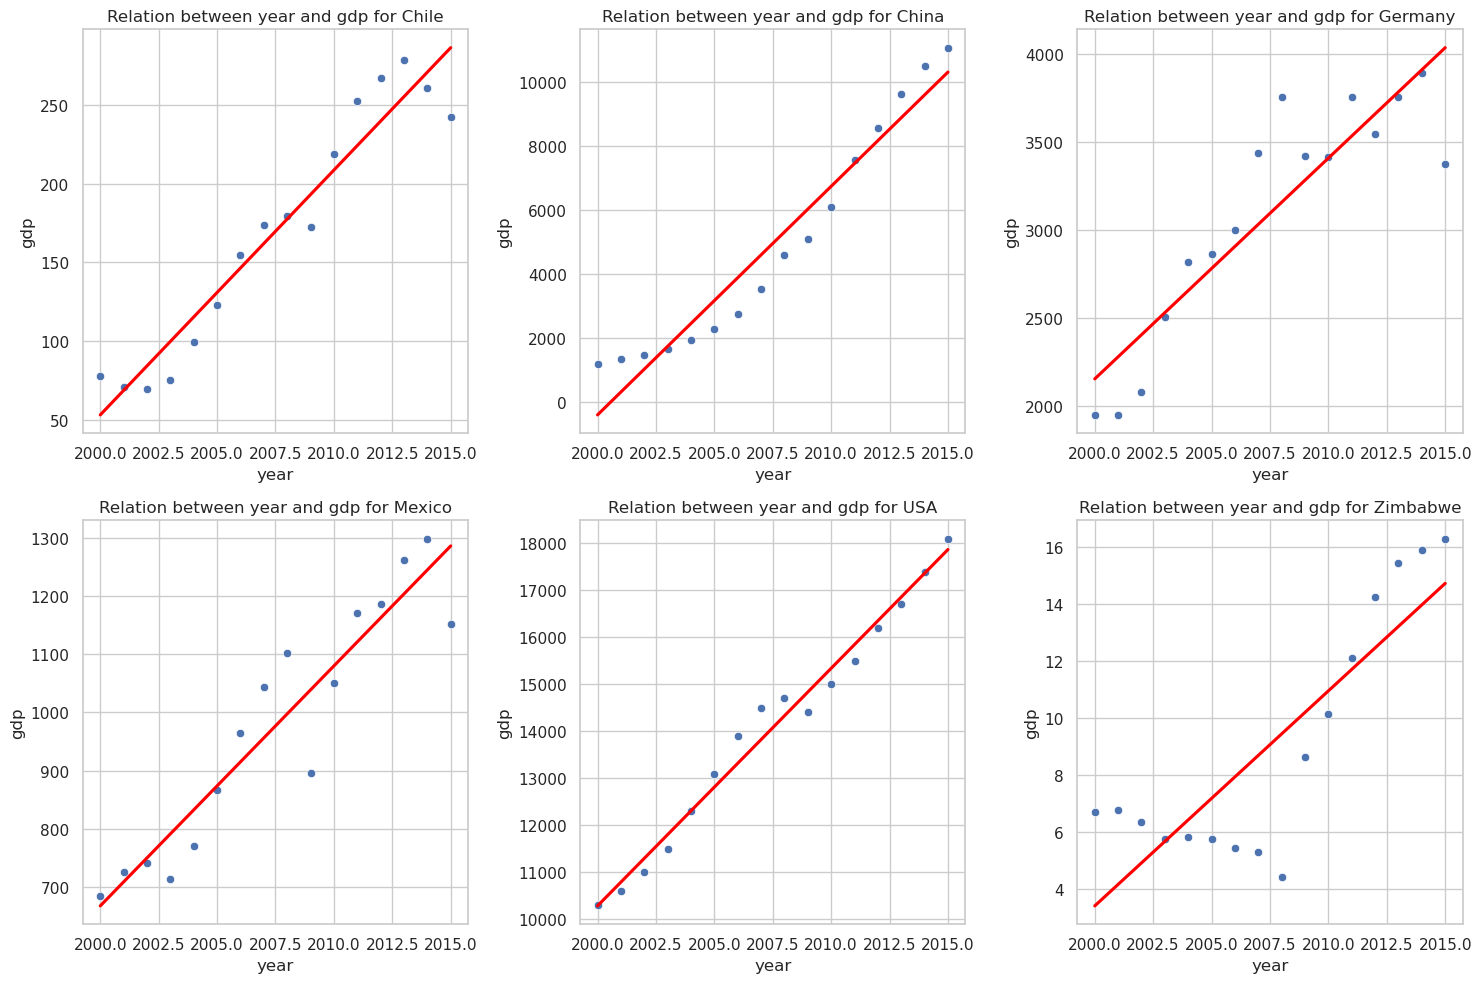

In [19]:
# GDP dynamics by year for each country
udf.plot_scatterplots_by_group(df, x='year', y='gdp', groupby='country', plots_per_row=3)

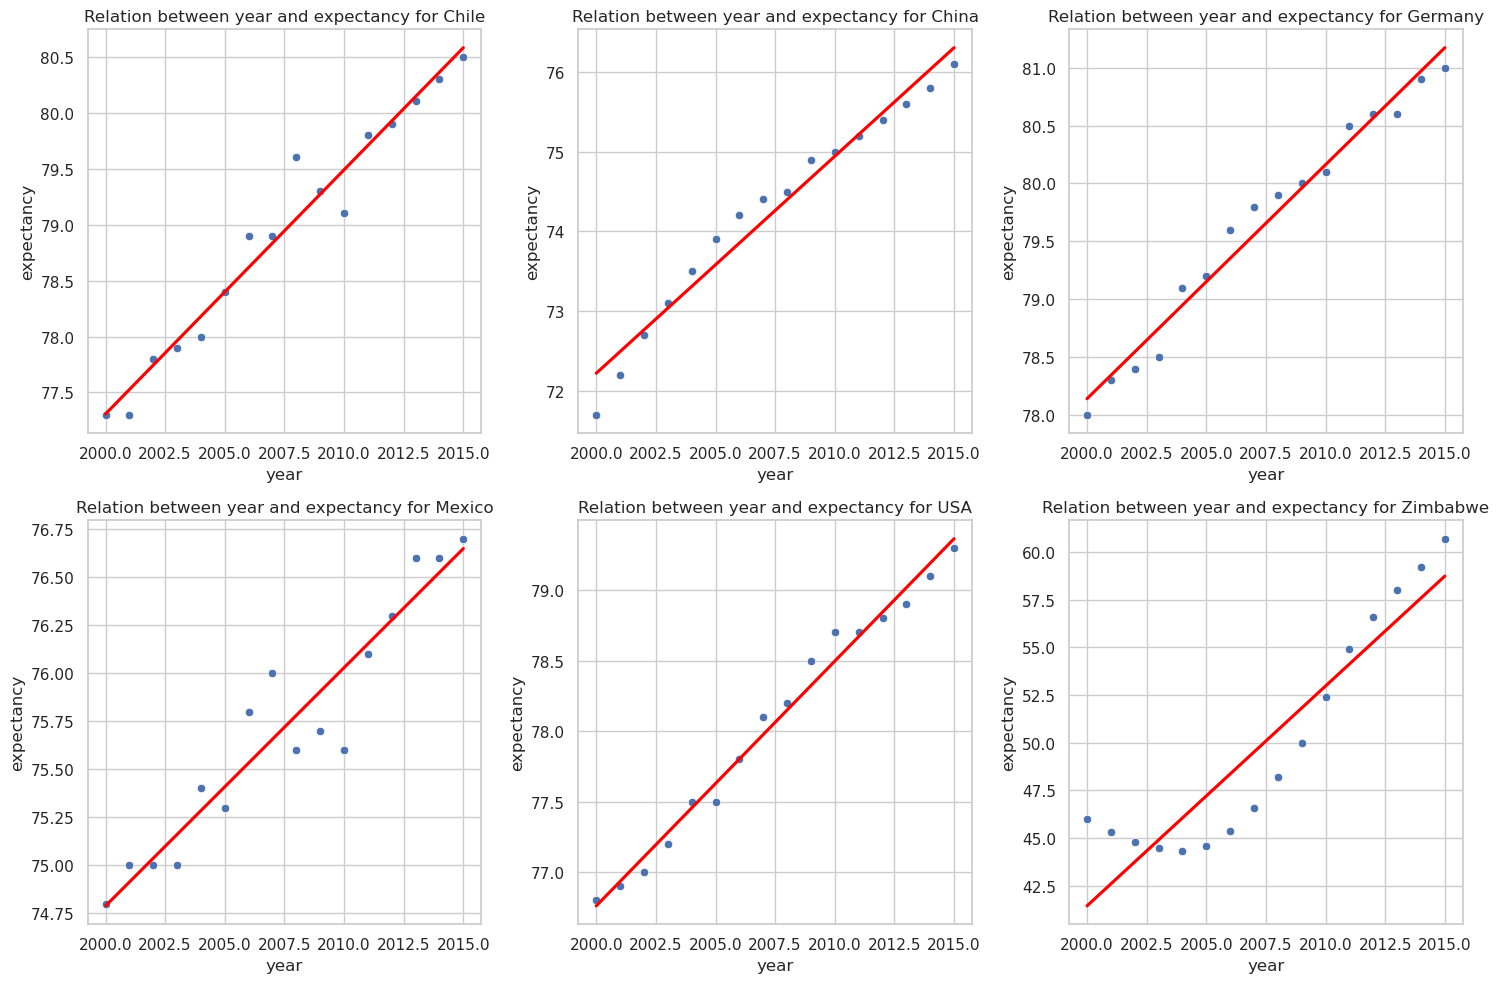

In [20]:
# Life expectancy dynamics by year for each country
udf.plot_scatterplots_by_group(df, x='year', y='expectancy', groupby='country', plots_per_row=3)

#### Conclusion

GDP by Year for Each Country:  
• Over the last 16 years, GDP has significantly increased  
• All countries, except Zimbabwe, demonstrate steady GDP growth, while Zimbabwe experienced a decline until 2008, followed by explosive growth.  
  
Life Expectancy by Year for Each Country:  
• Over the last 16 years, life expectancy has increased (by 15 years in Zimbabwe and by 2-4 years in other countries)  
• Similar to GDP, all countries except Zimbabwe show stable growth in life expectancy, while Zimbabwe experienced a decline until 2004, after which there was a sharp increase  
  
GDP and Life Expectancy:  
• There is a strong positive correlation for each country, ranging from 0.91 to 0.98. As GDP grows in all countries, life expectancy also increases  
• However, life expectancy is not rising as rapidly as GDP  
• The most significant growth is seen in Zimbabwe: from 45 to 60 years (while in other countries, the growth is less pronounced due to already high life expectancy)  